# Anjumanara Athina(155142)
# Lim Wei Sen (154151)
# Nicolas Chuang Hui Jiang (152504)
# Ong Jia Jie (153818)

# Neural Network

In [1]:
#pip install tensorflow
#tensorflow is installed to use neural network

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import tensorflow as tf
%config Completer.use_jedi = False

In [3]:
print(tf.test.gpu_device_name())
# to see if gpu is available

In [4]:
df = pd.read_csv('biodeg.csv', sep=';') #read dataset

In [5]:
print(df)

      SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-    C%  nCp  nO  \
0       3.919   2.6909    0         0         0       0     0  31.4    2   0   
1       4.170   2.1144    0         0         0       0     0  30.8    1   1   
2       3.932   3.2512    0         0         0       0     0  26.7    2   4   
3       3.000   2.7098    0         0         0       0     0  20.0    0   2   
4       4.236   3.3944    0         0         0       0     0  29.4    2   4   
...       ...      ...  ...       ...       ...     ...   ...   ...  ...  ..   
1050    5.431   2.8955    0         0         0       2     0  32.1    4   1   
1051    5.287   3.3732    0         0         9       0     0  35.3    0   9   
1052    4.869   1.7670    0         1         9       0     5  44.4    0   4   
1053    5.158   1.6914    2         0        36       0     9  56.1    0   0   
1054    5.076   2.6588    2         0         0       0     4  54.5    0   0   

      ...  C-026  F02[C-N]  nHDon  SpMa

In [6]:
df.keys()#get parameters and response

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L',
       'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)',
       'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d',
       'B04[C-Br]', 'SdO', 'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon',
       'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX',
       'experimental_class'],
      dtype='object')

In [7]:
X = df[['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L',
       'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)',
       'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d',
       'B04[C-Br]', 'SdO', 'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon',
       'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX']]#parameters
y = df['experimental_class']#response
df['experimental_class'] = df['experimental_class'].replace(['NRB'],'0')
df['experimental_class'] = df['experimental_class'].replace(['RB'],'1')
df['experimental_class'] = df['experimental_class'].astype(int)#convert response to 0 and 1 and as type int for neural network 
X = X.values #convert to numpy array
y = y.values #convert to numpy array
print(X.shape)
print(y.shape)

(1055, 41)
(1055,)


In [8]:
df['experimental_class'].dtypes #check the response data type

dtype('int32')

In [9]:
from sklearn.preprocessing import LabelEncoder #normalize label to numerical labels
lb = LabelEncoder()
y = lb.fit_transform(y)

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
seed_num = 10
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed_num)#split dataset to 8:2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1,random_state=seed_num)#split dataset to 8:2
print(X_train.shape)
print(X_val.shape)
print(X_test.shape) #get size

(949, 41)
(106, 41)
(211, 41)


In [11]:
from tensorflow.keras.models import Sequential #sequential container
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(41,)), #insert size
tf.keras.layers.Dense(50, activation='relu', dtype='float64'),
tf.keras.layers.Dense(1, activation='sigmoid', dtype='float64')
])

In [12]:
model.summary() #summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2100      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,151
Trainable params: 2,151
Non-trainable params: 0
_________________________________________________________________


In [13]:
predictions = model(X_train[:1]).numpy() #perform prediction on first row
predictions

array([[0.6457415]])

In [14]:
loss_fn = tf.keras.losses.BinaryCrossentropy() # from_logits=False is the default # as reponse is 0 and 1 which is binary

In [15]:
loss_fn(y_train[:1], predictions).numpy() #loss function

1.037728113094087

In [16]:
model.compile(optimizer='adam', # to train model
loss=loss_fn, # loss function
metrics=['accuracy']) # metric to monitor the model

In [17]:
model.fit(X_train, y_train, batch_size=64, epochs=200) #train the model

Epoch 1/200
15/15 [==============================] - 1s 3ms/step - loss: 0.7826 - accuracy: 0.3878
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.6407
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.6554
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.6554
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.6596
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.6934
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7271
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7597
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7850
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8040
Epoch 11/

In [18]:
model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 4ms/step - loss: 0.2316 - accuracy: 0.8863


[0.23160220682621002, 0.8862559199333191]

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report#print scores
y_pred = model.predict(X_test)
y_pred = np.round(y_pred) # round the predicted value y >= 0.5 is 1 else 0
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 3ms/step
0.8862559241706162
[[134  13]
 [ 11  53]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       147
           1       0.80      0.83      0.82        64

    accuracy                           0.89       211
   macro avg       0.86      0.87      0.87       211
weighted avg       0.89      0.89      0.89       211



### Reference: Lab 7b - Neural Networks

# Fuzzy Logic System

In [20]:
#pip install -U scikit-fuzzy
#installed it to use fuzzy functions

In [21]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#Chosen parameters to be used for fuzzy logic system
#Parameters chosen using ANOVA
SpMax_L = ctrl.Antecedent(np.arange(2, 8, 1), 'SpMax_L')
J_Dze = ctrl.Antecedent(np.arange(0, 11, 1), 'J_Dze')
nHM = ctrl.Antecedent(np.arange(0, 13, 1), 'nHM')
SpMax_Bm = ctrl.Antecedent(np.arange(2, 12, 1), 'SpMax_Bm')
nN = ctrl.Antecedent(np.arange(0, 9, 1), 'nN')
SM6_Bm = ctrl.Antecedent(np.arange(4, 16, 1), 'SM6_Bm')
experimental_class = ctrl.Consequent(np.arange(0, 2, 1), 'experimental_class')

In [23]:
SpMax_L['low'] = fuzz.trimf(SpMax_L.universe, [2, 2, 5]) # [start value, highest membership, last value]
SpMax_L['medium'] = fuzz.trimf(SpMax_L.universe, [2, 5, 7])
SpMax_L['high'] = fuzz.trimf(SpMax_L.universe, [5, 7, 7])

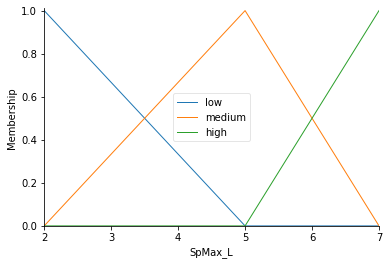

In [24]:
SpMax_L.view()

In [25]:
J_Dze['low'] = fuzz.trimf(J_Dze.universe, [0, 0, 5])
J_Dze['medium'] = fuzz.trimf(J_Dze.universe, [0, 5, 10])
J_Dze['high'] = fuzz.trimf(J_Dze.universe, [5, 10, 10])

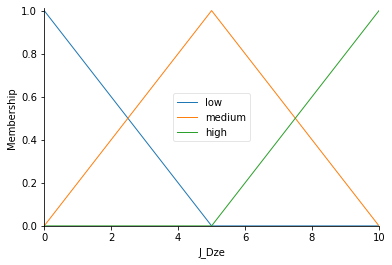

In [26]:
J_Dze.view()

In [27]:
nHM['low'] = fuzz.trimf(nHM.universe, [0, 0, 3.5])
nHM['medium'] = fuzz.trimf(nHM.universe, [0, 3.5, 12])
nHM['high'] = fuzz.trimf(nHM.universe, [3.5, 12, 12])

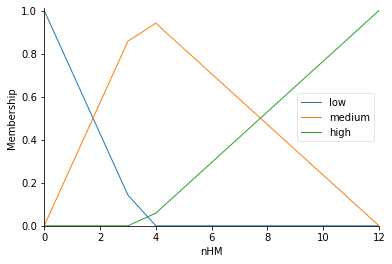

In [28]:
nHM.view()

In [29]:
SpMax_Bm['low'] = fuzz.trimf(SpMax_Bm.universe, [2, 2, 4])
SpMax_Bm['medium'] = fuzz.trimf(SpMax_Bm.universe, [2, 4, 11])
SpMax_Bm['high'] = fuzz.trimf(SpMax_Bm.universe, [4, 11, 11])

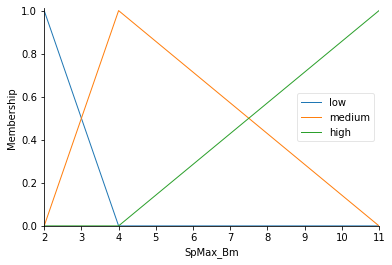

In [30]:
SpMax_Bm.view()

In [31]:
nN['low'] = fuzz.trimf(nN.universe, [0, 0, 4])
nN['medium'] = fuzz.trimf(nN.universe, [0, 4, 8])
nN['high'] = fuzz.trimf(nN.universe, [4, 8, 8])

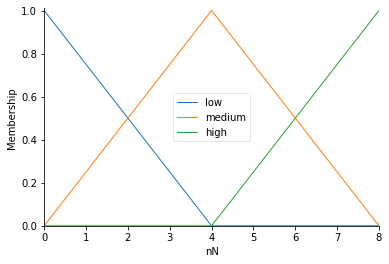

In [32]:
nN.view()

In [33]:
SM6_Bm['low'] = fuzz.trimf(SM6_Bm.universe, [4, 4, 10])
SM6_Bm['medium'] = fuzz.trimf(SM6_Bm.universe, [4, 10, 15])
SM6_Bm['high'] = fuzz.trimf(SM6_Bm.universe, [10, 15, 15])

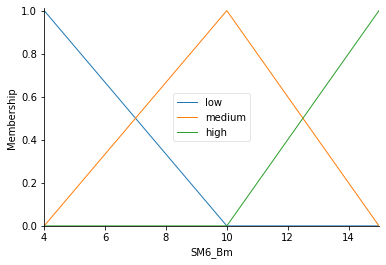

In [34]:
SM6_Bm.view()

In [35]:
experimental_class['NRB'] = fuzz.trimf(experimental_class.universe, [0, 0, 0.5])
experimental_class['RB'] = fuzz.trimf(experimental_class.universe, [0.5, 1, 1])

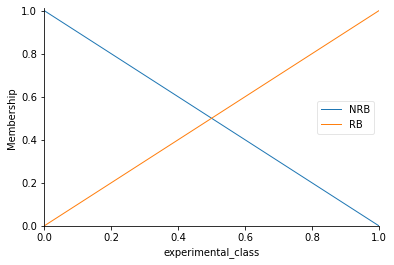

In [36]:
experimental_class.view()

In [37]:
#Fuzzy rules
rule1 = ctrl.Rule(SpMax_L['low'] , experimental_class['RB'])
rule2 = ctrl.Rule(SpMax_L['high'] , experimental_class['NRB'])
rule3 = ctrl.Rule(J_Dze['low'] , experimental_class['RB'])
rule4 = ctrl.Rule(J_Dze['high'] , experimental_class['NRB'])
rule5 = ctrl.Rule(nHM['low'] , experimental_class['RB'])
rule6 = ctrl.Rule(nHM['high'] , experimental_class['NRB'])
rule7 = ctrl.Rule(SpMax_Bm['low'] , experimental_class['RB'])
rule8 = ctrl.Rule(SpMax_Bm['high'] , experimental_class['NRB'])
rule9 = ctrl.Rule(nN['low'] , experimental_class['RB'])
rule10 = ctrl.Rule(nN['high'] , experimental_class['NRB'])
rule11 = ctrl.Rule(SM6_Bm['low'] , experimental_class['RB'])
rule12 = ctrl.Rule(SM6_Bm['high'] , experimental_class['NRB'])

In [38]:
#insert rules 
experiment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

In [42]:
experiment = ctrl.ControlSystemSimulation(experiment_ctrl)#process input

In [43]:
df = pd.read_csv('biodeg.csv', sep=';') #read dataset

In [44]:
X = df[['SpMax_L','J_Dz(e)','nHM','SpMax_B(m)','nN','SM6_B(m)']]#features chosen using ANOVA
y = df['experimental_class']

In [45]:
df['experimental_class'] = df['experimental_class'].replace(['NRB'],'0') #replacing response with 0 and 1 for prediction
df['experimental_class'] = df['experimental_class'].replace(['RB'],'1')
df['experimental_class'] = df['experimental_class'].astype(int)

In [46]:
def fuzzypredict(X,y):#fuzzy prediction function
    X1 = X['SpMax_L'].values
    X2 = X['J_Dz(e)'].values
    X3 = X['nHM'].values
    X4 = X['SpMax_B(m)'].values
    X5 = X['nN'].values
    X6 = X['SM6_B(m)'].values
    yhat = [3]*1055

    
    for i in range(1055):
        experiment.input['SpMax_L']= X1#inputing values
        experiment.input['J_Dze']= X2
        experiment.input['nHM']= X3
        experiment.input['SpMax_Bm']= X4
        experiment.input['nN']= X5
        experiment.input['SM6_Bm']= X6
        experiment.compute()#predict values
        yhat = experiment.output['experimental_class']#store value in array
        
        
        
          
    return yhat


In [47]:
yhat = fuzzypredict(X, y) #function to predict #takes 3 minutes to load

In [48]:
print(yhat) #to see predicted values

[0.66666667 0.66666667 0.66666667 ... 0.60087719 0.45957522 0.65446436]


In [49]:
for i in range(1055):#convert to 0 and 1 for comparison
    if yhat[i] > 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0

In [50]:
print(yhat)

[1. 1. 1. ... 1. 0. 1.]


In [51]:
X = df[['SpMax_L','J_Dz(e)','nHM','SpMax_B(m)','nN','SM6_B(m)']]
y = df['experimental_class']
df['experimental_class'] = df['experimental_class'].replace(['NRB'],'0')
df['experimental_class'] = df['experimental_class'].replace(['RB'],'1')
df['experimental_class'] = df['experimental_class'].astype(int)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #report scores
print(accuracy_score(y, yhat))
print(confusion_matrix(y, yhat))
print(classification_report(y, yhat))

0.3412322274881517
[[  4 695]
 [  0 356]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       699
           1       0.34      1.00      0.51       356

    accuracy                           0.34      1055
   macro avg       0.67      0.50      0.26      1055
weighted avg       0.78      0.34      0.18      1055



### Reference: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html